In [1]:
import os
import time

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
import tensorflow_datasets as tfds

from data.imagenet_labels import imagenet_labels

In [2]:
ds_name = 'imagenet2012'
ds = tfds.load(ds_name)
print(ds)

{'train': <PrefetchDataset shapes: {file_name: (), image: (None, None, 3), label: ()}, types: {file_name: tf.string, image: tf.uint8, label: tf.int64}>, 'validation': <PrefetchDataset shapes: {file_name: (), image: (None, None, 3), label: ()}, types: {file_name: tf.string, image: tf.uint8, label: tf.int64}>, 'test': <PrefetchDataset shapes: {file_name: (), image: (None, None, 3), label: ()}, types: {file_name: tf.string, image: tf.uint8, label: tf.int64}>}


In [3]:
#image = Image.open('./data/raw/images.jpg')
#image = np.array(image)
#print(image.shape)
#plt.imshow(image)
#plt.show()
#im_tensor = tf.constant([image],dtype = tf.uint8)

In [4]:
def im_resize(im_tensor):
    H, W, C = im_tensor.shape
    if H > W: 
        new_H, new_W = 4096, W*(4096//H)
    elif W > H : 
        new_H, new_W = H*(4096//W), 4096
    else : 
        new_H, new_W = 4096, 4096

    re_im = tf.image.resize(im_tensor, [new_H, new_W])
    re_im = tf.image.resize_with_pad(re_im, 4096, 4096)
    re_im = tf.cast(re_im, dtype=tf.uint8)
    return re_im

69.62245798110962


<function matplotlib.pyplot.show(close=None, block=None)>

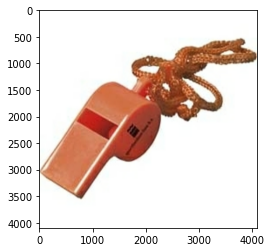

In [5]:
ds = ds['train'].take(500)
indx = 0
tic = time.time()
for example in ds:
    im_tensor = example['image']
    label = example['label']
    
    im_tensor = im_resize(im_tensor)
    
    path = './data/prepared/' + str(label.numpy())
    os.makedirs(path, exist_ok=True)
    
    np.save(path+"/{}.npy".format(indx),im_tensor) # : 14 s
    #np.savez(path+"/{}.npz".format(indx),im_tensor) # : 17 s
    #fp = np.memmap(path+"/{}.dat".format(indx), dtype='uint8', mode='w+', shape=im_tensor.numpy().shape)
    #fp[:] = im_tensor[:]
    
toc = time.time()
print(toc - tic)
    
plt.imshow(im_tensor)
plt.show

In [6]:
!rm -r /tf/data/prepared/*

In [12]:
tic = time.time()

train_x_y = []
for label in os.listdir('./data/prepared/'):
    if label.isnumeric():
        for f_name in os.listdir('./data/prepared/{0}'.format(label)):
            train_x_y.append(('./data/prepared/{0}/{1}'.format(label,f_name),label))
toc = time.time()
print(toc - tic)

0.0008301734924316406


0.03157234191894531


<function matplotlib.pyplot.show(close=None, block=None)>

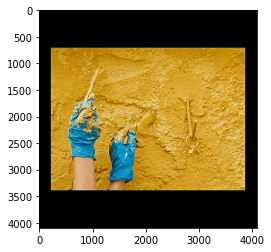

In [13]:
tic = time.time()
for x, y in train_x_y:
    loaded_im = np.load(x,mmap_mode = 'r')
toc = time.time()
print(toc - tic)
plt.imshow(loaded_im)
plt.show

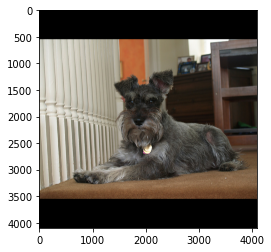

In [15]:
plt.imshow(re_im)
plt.show()

In [14]:
150000/3600


41.666666666666664